## Plant-seedlings-classification using already trained Inceptionv4 on all data.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

import pandas as pd
import numpy as np

In [3]:
PATH = 'data/plants/'

In [4]:
ls {PATH}

labels.csv                  submission_inceptionv4_NOVALIDATION.csv  test.zip
models/                     submission_resnet34.csv                  tmp/
sample_submission.csv       submission_resnet50.csv                  train/
sample_submission.csv.zip   submission_resnet50_NOVALID.csv          train.zip
submission_inceptionv4.csv  test/


In [5]:
# Using inceptionv4 from pytorch 
arch = inception_4

label_csv = f'{PATH}labels.csv'

label_df = pd.read_csv(label_csv)

# Remplace all empty space by _
label_df.species = label_df.species.apply(lambda x: re.sub(' ', '_', x))

# Set our validation set for one image
n = len(list(open(label_csv)))-1
val_idxs = [0]

print(val_idxs)

[0]


In [7]:
def get_data(sz):
    # Augment our data
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 
                                        'train',
                                        label_csv, 
                                        bs=124,
                                        tfms=tfms,
                                        val_idxs=val_idxs, 
                                        test_name='test')

## Training

### Start training with small images 224x224

In [8]:
sz = 224
data = get_data(sz)

In [9]:
learn = ConvLearner.pretrained(arch, data, precompute=False)

# Load our already trained model  
learn.load('inceptionv4_340')

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.158821   12.288504  0.0       



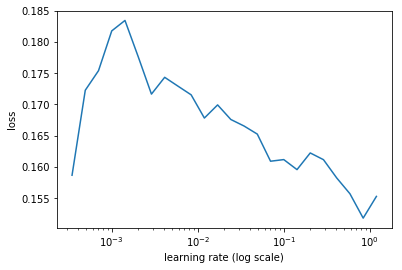

In [10]:
lrf=learn.lr_find()
learn.sched.plot()

In [11]:
lr = 0.2

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.12809    0.0012     1.0       
    1      0.117524   0.001592   1.0                       
    2      0.111188   0.001188   1.0                       
    3      0.106332   0.001524   1.0                       
    4      0.099981   0.000477   1.0                        
    5      0.103673   0.001616   1.0                        
    6      0.102351   0.001122   1.0                       
    7      0.097164   0.000977   1.0                        
    8      0.091464   0.001666   1.0                        
    9      0.088542   0.000853   1.0                        
    10     0.085637   0.001033   1.0                        
    11     0.081977   0.000859   1.0                        
    12     0.083032   0.000882   1.0                        



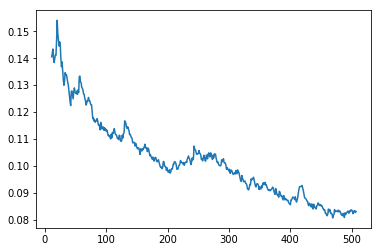

In [12]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)
learn.sched.plot_loss()

In [14]:
lrs = np.array([lr/9,lr/3,lr])

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.15691    0.024824   1.0       
    1      0.16739    0.000482   1.0                       
    2      0.13846    0.010849   1.0                       
    3      0.10254    0.008669   1.0                       
    4      0.11295    0.017976   1.0                        
    5      0.115077   0.092193   1.0                       
    6      0.110609   0.000197   1.0                       
    7      0.106322   0.000927   1.0                       
    8      0.085464   0.000923   1.0                        
    9      0.072722   0.003113   1.0                        
    10     0.0573     0.001546   1.0                        
    11     0.046755   0.001287   1.0                        
    12     0.03965    0.00097    1.0                        



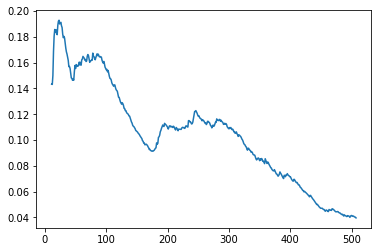

In [15]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.0235     0.000887   1.0       
    1      0.027243   0.000539   1.0                        
    2      0.027678   0.00012    1.0                        
    3      0.024736   0.0002     1.0                        
    4      0.025875   0.000222   1.0                        
    5      0.022894   0.000138   1.0                        
    6      0.020656   0.000115   1.0                        
    7      0.022338   0.000101   1.0                        
    8      0.02236    0.000142   1.0                        
    9      0.022638   0.000121   1.0                        
    10     0.022857   0.000202   1.0                        
    11     0.022698   0.000162   1.0                        
    12     0.023308   0.000189   1.0                        



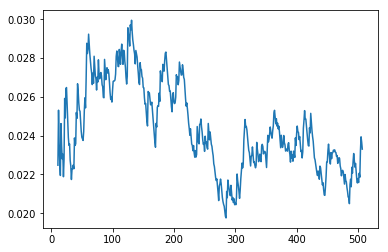

In [16]:
learn.freeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.047071   0.000389   1.0       
    1      0.074812   0.008835   1.0                        
    2      0.063908   0.000795   1.0                        
    3      0.05163    0.002118   1.0                        
    4      0.071336   0.000339   1.0                        
    5      0.072497   0.007112   1.0                        
    6      0.07197    0.000417   1.0                        
    7      0.073162   0.001064   1.0                        
    8      0.06137    0.000182   1.0                        
    9      0.049167   0.000288   1.0                        
    10     0.035048   0.000225   1.0                        
    11     0.029396   0.00017    1.0                        
    12     0.022322   0.00017    1.0                        



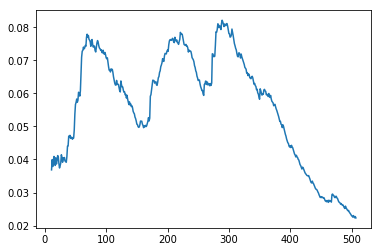

In [17]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)
learn.sched.plot_loss()

#### Change size to 299 x 299

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.037739   0.000209   1.0       
    1      0.037153   0.000242   1.0                        
    2      0.033541   3.1e-05    1.0                        
    3      0.030253   4.8e-05    1.0                        
    4      0.029273   2.5e-05    1.0                        
    5      0.025997   1.3e-05    1.0                        
    6      0.027632   2.1e-05    1.0                        
    7      0.027151   6.9e-05    1.0                        
    8      0.027986   6.3e-05    1.0                        
    9      0.026356   7.1e-05    1.0                        
    10     0.028339   3.6e-05    1.0                        
    11     0.02573    5.5e-05    1.0                        
    12     0.026497   3.8e-05    1.0                        



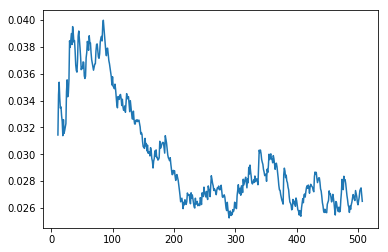

In [18]:
sz=299

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.049514   1.7e-05    1.0       
    1      0.065169   0.006909   1.0                        
    2      0.050892   0.001929   1.0                        
    3      0.036008   0.000257   1.0                        
    4      0.043371   0.000356   1.0                        
    5      0.037632   0.000249   1.0                        
    6      0.039693   0.000346   1.0                        
    7      0.033947   0.001428   1.0                        
    8      0.029373   6.9e-05    1.0                        
    9      0.021807   3.6e-05    1.0                        
    10     0.014613   1.7e-05    1.0                        
    11     0.009747   1.1e-05    1.0                         
    12     0.009356   1.3e-05    1.0                         



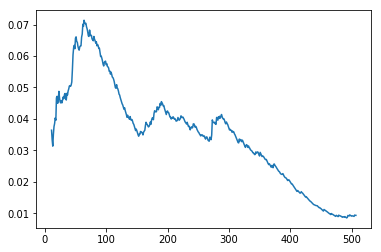

In [19]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)
learn.save(f'inceptionv4_299_NOVALIDATION')
learn.sched.plot_loss()

#### Change size to 340 x 340

In [6]:
# Changed batch size from 124 to 86.
def get_data(sz):
    # Augment our data
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 
                                        'train',
                                        label_csv, 
                                        bs=86,
                                        tfms=tfms,
                                        val_idxs=val_idxs, 
                                        test_name='test')

In [7]:
# Run this only if kernel need to be restarted
sz = 299
data = get_data(sz)
lr = 0.2

# Load our model
learn = ConvLearner.pretrained(arch, data, precompute=False)

# Load our model
learn.load('inceptionv4_299')

In [11]:
sz=340

# Change lr to smaller rates
lrs = np.array([lr/18,lr/6,lr/2])

learn.set_data(get_data(sz))

learn.freeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.062922   0.001182   1.0       
    1      0.062142   0.000283   1.0                        
    2      0.059036   0.000969   1.0                        
    3      0.060495   0.000313   1.0                        
    4      0.066244   0.000527   1.0                        
    5      0.058114   0.00016    1.0                        
    6      0.056653   0.000547   1.0                        
    7      0.05218    0.000401   1.0                        
    8      0.053424   0.000896   1.0                        
    9      0.054296   0.000876   1.0                        
    10     0.05302    0.001097   1.0                        
    11     0.050352   0.000882   1.0                        
    12     0.060609   0.000893   1.0                        



In [27]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)
learn.save(f'inceptionv4_340_NOVALIDATION')
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.014412   0.0        1.0       
    1      0.052041   0.001      1.0                        
    2      0.047934   0.000504   1.0                        
    3      0.040459   0.000114   1.0                        
 39%|███▉      | 22/56 [00:43<01:07,  1.97s/it, loss=0.0455]

KeyboardInterrupt: 

### Prediction and submition

In [12]:
log_preds_test = learn.predict(is_test=True)
log_preds_test.shape

(794, 12)

In [13]:
# replace _ by " " for submition
#label_df.species = label_df.species.apply(lambda x: re.sub(' ', '_', x))

log_preds_test = np.argmax(log_preds_test, axis=1)
preds_classes = [data.classes[i].replace("_", " ") for i in log_preds_test]
probs = np.exp(log_preds_test)


submission = pd.DataFrame({'file': os.listdir(f'{PATH}test'), 'species': preds_classes})
submission.to_csv('data/plants/submission_inceptionv4_NOVALIDATION.csv', index=False)

In [14]:
from IPython.display import FileLink
FileLink('data/plants/submission_inceptionv4_NOVALIDATION.csv')

/home/paperspace/fastai/courses/dl1/data/plants/submission_inceptionv4_NOVALIDATION.csv

### Give us score of 0.96599